In [ ]:
#objective: Predict number of rings

In [38]:
#load libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
#from sklearn import cross_validation
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
#load data
names = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'visceria_weight', 'shell_weight', 'rings']

df = pd.read_csv('../datasets/abalone.data.csv', names = names)



In [49]:
#take a glimpse at the data
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,visceria_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [29]:
#check for missing data
nan_rows = df.isnull().T.any().T.sum()
#drop missing data
df = df.dropna()

In [31]:
nan_rows.shape

()

In [54]:
#summary statistics
df.describe()

,length,diameter,height,whole_weight,shucked_weight,visceria_weight,shell_weight,rings,F,I
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,0.312904,0.321283
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,0.463731,0.467025
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,1.000000,1.000000


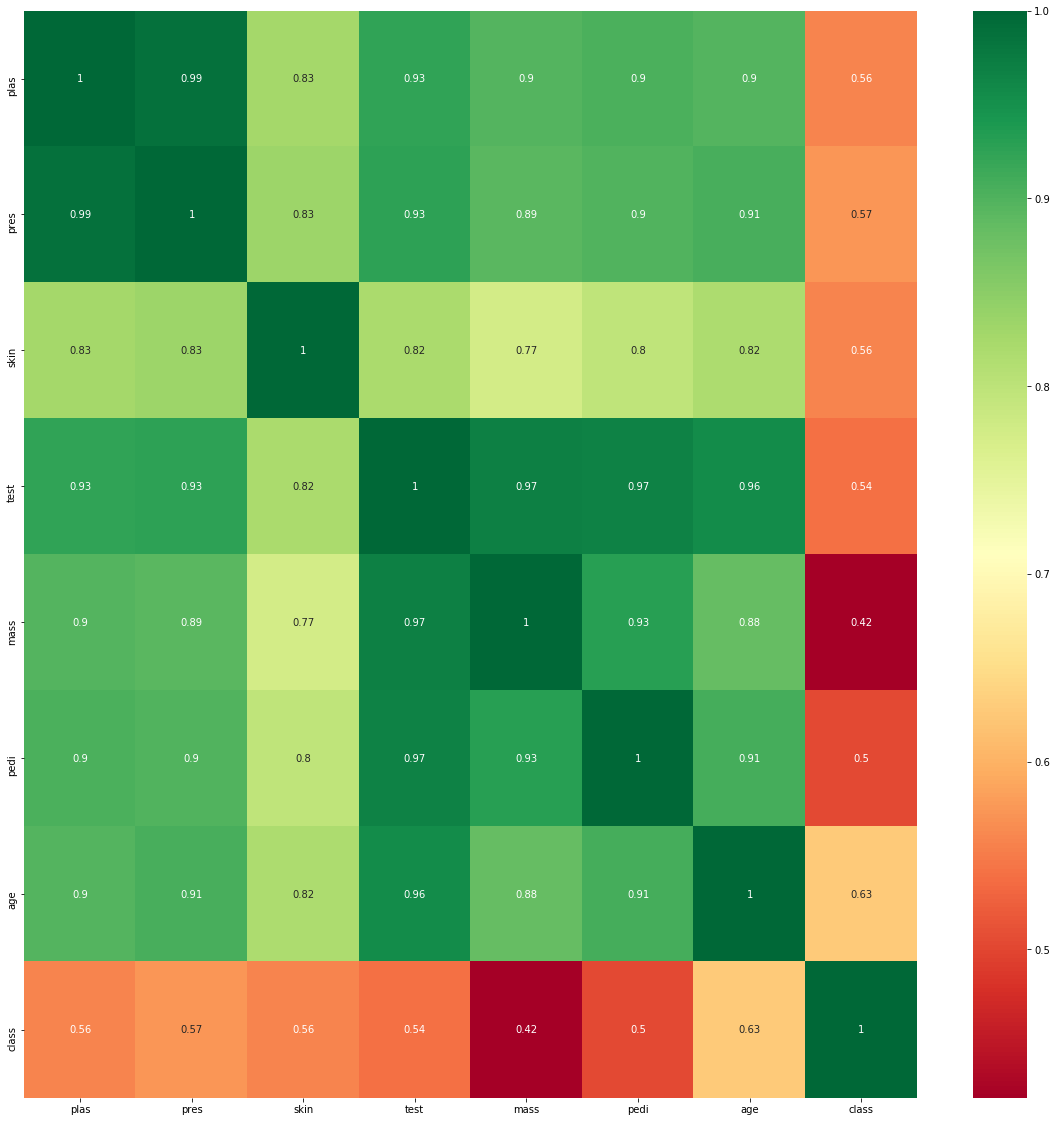

In [42]:
#correlation
x = df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='RdYlGn',annot=True)
plt.show();

In [52]:
#encode sex
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df['sex'])
# Drop column B as it is now encoded
df = df.drop('sex',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df = df.drop('M',axis = 1)
df

,length,diameter,height,whole_weight,shucked_weight,visceria_weight,shell_weight,rings,F,I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8,0,1
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20,1,0
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16,1,0
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9,0,0
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19,1,0


In [55]:
#build regression model
X = df.drop('rings', axis=1)
y = df[['rings']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [56]:
#calculate regression
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [65]:
#coefficients
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regr.coef_[0][idx]))

The coefficient for length is -1.4524099555882237
The coefficient for diameter is 12.657180310715018
The coefficient for height is 9.161057486124049
The coefficient for whole_weight is 8.488246352829872
The coefficient for shucked_weight is -19.419540026692005
The coefficient for visceria_weight is -9.07097611264675
The coefficient for shell_weight is 8.837296161009712
The coefficient for F is -0.09705977868541638
The coefficient for I is -0.9066216803628935


In [58]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [68]:
#regression metrics
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('R2:', regr.score(X_test, y_test))

Mean Absolute Error: 1.5679545995097006
Mean Squared Error: 4.765958180742245
Root Mean Squared Error: 2.1831074597330855
R2 0.5363171975748965
